In [1]:
from math import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import collections  as mc
from matplotlib.patches import Ellipse, Wedge, Polygon
from matplotlib.path import Path
import matplotlib
import itertools

from scipy.spatial import distance
from scipy import signal
from google.colab import files


I want to be able to use the Amanda Ghassaei's [Origami Simulator](https://origamisimulator.org/) to test the output of the script. 

In this next block, I'm fixing up the matplotlib output to be more compatible with the simulator.

In [3]:
indef = False
def rm_clippath(line):
  global indef

  if not indef:
    f = line.find('<clipPath')
  else:
    f = line.find('</clipPath>')
  if f >= 0:
    indef = not indef
    return ""
  if indef: return ""

  f = line.find('clip-path')
  if (f < 0): return line
  fc = line.find('"', f) + 1
  fe = line.find('"', fc) +1
  return line[:f]+line[fe:]

def fixup_svg(infile):
  global indef
  indef = False
  outfile = "kt_"+ infile
  delete_list = ['fill:none;']
  with open(infile) as fin, open(outfile, "w+") as fout:
    for line in fin:
      line = rm_clippath(line)
      for word in delete_list:
        line = line.replace(word, "")
      fout.write(line)
  return outfile

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

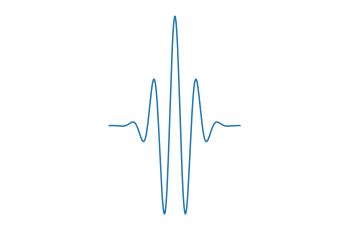

In [4]:
edge = 0.6

t = np.linspace(-edge, edge, 2 * 100, endpoint=False)
i, q, e = signal.gausspulse(t, fc=5, retquad=True, retenv=True)
plt.plot(t, i)

plt.axis('equal')
plt.axis('off')

name = "gausspulse"
plt.savefig(name + ".svg")
outputfilename = fixup_svg(name + ".svg")
files.download(outputfilename)


In [ ]:
from scipy.signal import sweep_poly
p = np.poly1d([0.003, 0.0, -0.2, 0, 2])
t = np.linspace(0, 10.6, 5001)
t = np.linspace(-10, 8, len(curve[1,:]))
w = sweep_poly(0.1*t, 10*curve[1,:])


plt.plot(t, w, 'b')
#plt.plot(t, curve[1,:], 'r')
plt.xlabel('t')
plt.tight_layout()
plt.show()

plt.axis('equal')
plt.axis('off')

name = "sweeppoly3"
plt.savefig(name + ".svg")
outputfilename = fixup_svg(name + ".svg")
#files.download(outputfilename)